In [1]:
import pywt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from  matplotlib.pyplot import figure

mydata = pd.read_csv("FinalData.csv")

lst = mydata.iloc[0].to_numpy()
lst = lst[1:]

mydata = mydata.T # transpose of the data frame

ind = mydata.index.values.tolist()
ind = ind[1:]

# print (ind)
# print (lst)



In [2]:

(cA, cD) = pywt.dwt(lst, 'db2', 'smooth') # using db2 wavelet function to decompose data 
A = pywt.idwt(cA, None, 'db2', 'smooth') # using inverse wavelet to reconstruct linear components
D = pywt.idwt(None, cD, 'db2', 'smooth') # using inverse wavelet to reconstruct non-linear components

# lst_rec = A + D # reconstruction of lst i.e data before decomposition


           data  linear components  non-linear components
7/1/2015     18          17.108253               0.891747
7/2/2015     11           9.455449               1.544551
7/3/2015      5          11.256570              -6.256570
7/4/2015     13          10.524519               2.475481
7/5/2015     14           9.921956               4.078044
...         ...                ...                    ...
12/27/2016   20          17.896234               2.103766
12/28/2016   22          19.325962               2.674038
12/29/2016   19          20.033494              -1.033494
12/30/2016   18          19.428525              -1.428525
12/31/2016   20          19.175240               0.824760

[550 rows x 3 columns]


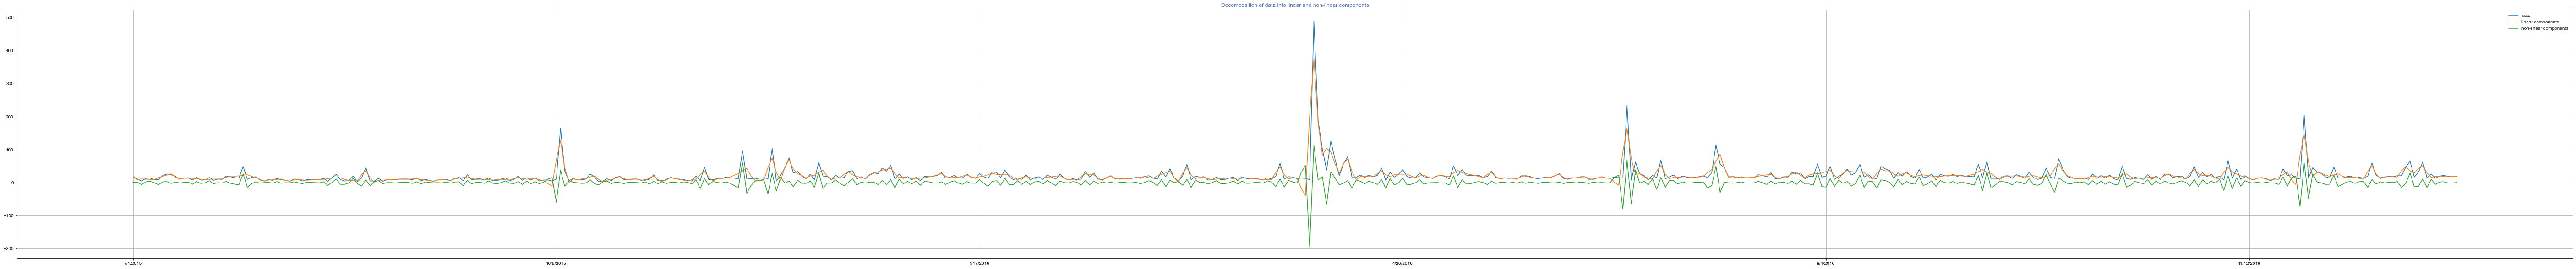

In [3]:
d = {'data': lst, 'linear components': A, 'non-linear components': D} # constructing map with non-decomposed and decomposed data
df = pd.DataFrame(d) # map -> data frame
df.index = ind 

print (df)

# figure(num=None, figsize=(100, 10), dpi=80, facecolor='w', edgecolor='k')
pl = df.plot(figsize=(100, 10), grid=True)

mpl.style.use('seaborn')
pl.set_title('Decomposition of data into linear and non-linear components'.format('seaborn'), color='C0')

pl.legend()

plt.show()